# Data Wrangling Template

In [1]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

## Gather

WeRateDogs Twitter archive

- WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

In [2]:
#Import csv file
tae = pd.read_csv('twitter-archive-enhanced.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'twitter-archive-enhanced.csv'

In [3]:
tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Create directory 
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Download file from url
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
response
with open(os.path.join(folder_name, url.split('/')[-1]), mode ='wb') as file:
    file.write(response.content)

In [5]:
#Import tsv file
ip = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

##### Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

##### You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


In [6]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Image Predictions File

- The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE



In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#OAuth is standardized way to login into applications

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tae_wo_retweets = tae.copy()
df_retweets = tae_wo_retweets.dropna(subset=['retweeted_status_id'])
tae_wo_retweets = tae_wo_retweets.drop(df_retweets.index)

NameError: name 'tae_wo_retweets' is not defined

In [10]:
tweet_ids = tae_wo_retweets.tweet_id.values

NameError: name 'tae_wo_retweets' is not defined

In [11]:
fails_dict={}

with open('tweet_json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass

NameError: name 'tweet_ids' is not defined

In [12]:
tw_api = pd.read_json('tweet_json.txt', lines = True)

In [13]:
tw_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [14]:
fails_dict

{872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 844704788403113984: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 837366284874571778: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 829374341691346946: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 779123168116150273: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 754011816964026368: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 680055455951884288: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}])}

## Assess

### Assessment of Twitter Archive Enhanced

In [154]:
tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [155]:
tae.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,None,None,None,None,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,pupper,None
2102,670679630144274432,NaN,NaN,2015-11-28 19:04:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pluto. He's holding little waddling do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670679630...,8,10,Pluto,None,None,None,None
412,822975315408461824,NaN,NaN,2017-01-22 01:12:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822975315...,12,10,Albus,None,None,None,None
1250,711008018775851008,NaN,NaN,2016-03-19 01:54:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,None,None,pupper,None


In [156]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [157]:
tae.tweet_id.duplicated().sum()

0

In [158]:
tae.in_reply_to_status_id.value_counts()

6.671522e+17    2
6.715449e+17    1
7.030419e+17    1
6.747400e+17    1
8.116272e+17    1
               ..
7.384119e+17    1
7.638652e+17    1
7.476487e+17    1
6.758457e+17    1
6.706684e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [159]:
tae.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.759620e+07     1
2.792810e+08     1
2.894131e+09     1
3.589728e+08     1
8.405479e+17     1
2.878549e+07     1
2.916630e+07     1
4.738443e+07     1
7.305050e+17     1
4.670367e+08     1
2.143566e+07     1
3.105441e+09     1
2.068372e+07     1
1.132119e+08     1
4.717297e+09     1
2.319108e+09     1
1.582854e+09     1
1.584641e+07     1
2.281182e+09     1
1.185634e+07     1
1.943518e+08     1
1.637468e+07     1
1.198989e+09     1
2.918590e+08     1
2.625958e+07     1
1.361572e+07     1
1.648776e+07     1
1.806710e+08     1
3.058208e+07     1
Name: in_reply_to_user_id, dtype: int64

In [160]:
tae.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
7.874618e+17      1
5.128045e+08      1
7.992370e+07      1
4.871977e+08      1
7.124572e+17      1
4.466750e+07      1
2.488557e+07      1
1.950368e+08      1
7.832140e+05      1
7.475543e+17      1
7.266347e+08      1
1.228326e+09      1
1.960740e+07      1
3.638908e+08      1
3.410211e+08      1
8.117408e+08      1
1.732729e+09      1
5.870972e+07      1
5.970642e+08      1
2.804798e+08      1
1.547674e+08      1
4.119842e+07      1
6.669901e+07      1
Name: retweeted_status_user_id, dtype: int64

In [161]:
tae.retweeted_status_id.value_counts()

6.816941e+17    1
8.688804e+17    1
8.071068e+17    1
8.099208e+17    1
7.932865e+17    1
               ..
7.902771e+17    1
6.671522e+17    1
7.638376e+17    1
8.083449e+17    1
6.675487e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [162]:
tae.retweeted_status_timestamp.value_counts()

2016-02-19 18:24:26 +0000    1
2017-02-08 17:00:26 +0000    1
2016-10-01 19:47:08 +0000    1
2015-11-24 03:51:38 +0000    1
2017-01-20 17:00:46 +0000    1
                            ..
2016-07-30 17:56:51 +0000    1
2017-02-16 23:23:38 +0000    1
2016-10-23 19:42:02 +0000    1
2016-09-29 16:03:01 +0000    1
2016-08-23 21:09:14 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [163]:
tae.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [164]:
tae.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [165]:
tae.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [166]:
tae.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [167]:
tae.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [168]:
tae.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [169]:
tae.query('rating_numerator > 100')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


### Assessment of Image Predictions

In [170]:
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [171]:
ip.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
1732,821149554670182400,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,malinois,0.203651,True,Irish_setter,0.091055,True
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
1078,717790033953034240,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,False,minibus,0.107383,False,cab,0.034846,False


In [172]:
ip.info()
#data types make sense
#no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [173]:
ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [174]:
ip.tweet_id.duplicated().sum()

0

In [175]:
ip.jpg_url.duplicated().sum()
#some duplicated values

66

In [176]:
ip.p1.value_counts()
#inconsistent formatting for p1

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hammer                  1
hay                     1
teapot                  1
cowboy_boot             1
mailbox                 1
Name: p1, Length: 378, dtype: int64

In [177]:
ip.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [178]:
ip.query('p1_dog == True').p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

In [179]:
ip.p2.value_counts()
#inconsistent formatting for p2

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
European_gallinule      1
wombat                  1
pelican                 1
space_heater            1
breastplate             1
Name: p2, Length: 405, dtype: int64

In [180]:
ip.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [181]:
ip.p3.value_counts()
#inconsistent formatting for p3

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
chain                  1
cardoon                1
wok                    1
cup                    1
barrow                 1
Name: p3, Length: 408, dtype: int64

In [182]:
ip.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [183]:
ip.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [184]:
df1 = ip.query('p1_dog == True')
df1.p2_dog.value_counts()

True     1398
False     134
Name: p2_dog, dtype: int64

In [185]:
df1.p3_dog.value_counts()

True     1334
False     198
Name: p3_dog, dtype: int64

In [186]:
df2 = ip.query('p2_dog == True')
df2.p3_dog.value_counts()
#inconsistent categorization (dog / no dog)

True     1344
False     209
Name: p3_dog, dtype: int64

### Assessment of Twitter API

In [187]:
tw_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [188]:
tw_api.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
758,2016-07-13 23:48:51+00:00,753375668877008896,753375668877008896,This is Hank. He's mischievous af. Doesn't eve...,False,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 753375662195507200, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7360,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
668,2016-08-24 15:43:39+00:00,768473857036525572,768473857036525568,Meet Chevy. He had a late breakfast and now ha...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 768473849214140416, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13192,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1065,2016-03-19 01:54:56+00:00,711008018775851008,711008018775851008,This is Chuckles. He had a balloon but he acci...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 711008011691683840, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2854,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1632,2015-12-15 02:43:33+00:00,676593408224403456,676593408224403456,This pupper loves leaves. 11/10 for committed ...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,4288,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
759,2016-07-13 18:26:16+00:00,753294487569522689,753294487569522688,This is Ace. He's a window washer. One of the ...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 753294480162295809, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3237,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [189]:
tw_api.info()
#some NaN
#some wrong data types
#tw_api.id = tae.tweet_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2168 non-null   datetime64[ns, UTC]
 1   id                             2168 non-null   int64              
 2   id_str                         2168 non-null   int64              
 3   full_text                      2168 non-null   object             
 4   truncated                      2168 non-null   bool               
 5   display_text_range             2168 non-null   object             
 6   entities                       2168 non-null   object             
 7   extended_entities              1987 non-null   object             
 8   source                         2168 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [190]:
tw_api.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.168000e+03,2.168000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2168.000000,2168.000000,2110.0,2110.0,2.500000e+01,2.500000e+01
mean,7.369189e+17,7.369189e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2322.337177,7810.738930,0.0,0.0,8.084109e+17,8.084109e+17
std,6.741173e+16,6.741173e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4132.150531,11518.141057,0.0,0.0,6.234902e+16,6.234902e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,49.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.768177e+17,6.768177e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,498.000000,1653.250000,0.0,0.0,7.719056e+17,7.719056e+17
50%,7.095381e+17,7.095381e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1106.000000,3525.500000,0.0,0.0,8.239662e+17,8.239662e+17
75%,7.891706e+17,7.891706e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2644.000000,9696.250000,0.0,0.0,8.556564e+17,8.556564e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,73549.000000,149433.000000,0.0,0.0,8.839657e+17,8.839657e+17


In [191]:
fails_dict

{872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 844704788403113984: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 837366284874571778: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 829374341691346946: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 779123168116150273: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 754011816964026368: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 680055455951884288: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}])}

In [192]:
tw_api.id.duplicated().sum()

0

In [193]:
tw_api.retweeted.value_counts()

False    2167
True        1
Name: retweeted, dtype: int64

In [194]:
tw_api.truncated.value_counts()
#delete truncated column

False    2168
Name: truncated, dtype: int64

In [195]:
tw_api.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2036
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [196]:
tw_api.retweet_count.describe()

count     2168.000000
mean      2322.337177
std       4132.150531
min          1.000000
25%        498.000000
50%       1106.000000
75%       2644.000000
max      73549.000000
Name: retweet_count, dtype: float64

In [197]:
tw_api.favorite_count.describe()

count      2168.000000
mean       7810.738930
std       11518.141057
min          49.000000
25%        1653.250000
50%        3525.500000
75%        9696.250000
max      149433.000000
Name: favorite_count, dtype: float64

In [198]:
tw_api.favorited.value_counts()

False    2168
Name: favorited, dtype: int64

In [199]:
tw_api.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2036
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [200]:
tae.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [201]:
tw_api.in_reply_to_status_id.value_counts()

6.671522e+17    2
6.715449e+17    1
8.795538e+17    1
8.211526e+17    1
6.747400e+17    1
               ..
7.384119e+17    1
7.638652e+17    1
7.476487e+17    1
6.758457e+17    1
6.706684e+17    1
Name: in_reply_to_status_id, Length: 76, dtype: int64

In [202]:
tae.in_reply_to_status_id.value_counts()

6.671522e+17    2
6.715449e+17    1
7.030419e+17    1
6.747400e+17    1
8.116272e+17    1
               ..
7.384119e+17    1
7.638652e+17    1
7.476487e+17    1
6.758457e+17    1
6.706684e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [203]:
tw_api.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.759620e+07     1
1.132119e+08     1
2.894131e+09     1
3.589728e+08     1
8.405479e+17     1
2.878549e+07     1
2.916630e+07     1
4.738443e+07     1
7.305050e+17     1
4.670367e+08     1
2.143566e+07     1
3.105441e+09     1
2.068372e+07     1
4.717297e+09     1
2.319108e+09     1
1.582854e+09     1
1.584641e+07     1
2.281182e+09     1
1.185634e+07     1
1.943518e+08     1
1.637468e+07     1
1.198989e+09     1
2.918590e+08     1
2.625958e+07     1
1.361572e+07     1
1.648776e+07     1
1.806710e+08     1
3.058208e+07     1
Name: in_reply_to_user_id, dtype: int64

In [204]:
tae.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.759620e+07     1
2.792810e+08     1
2.894131e+09     1
3.589728e+08     1
8.405479e+17     1
2.878549e+07     1
2.916630e+07     1
4.738443e+07     1
7.305050e+17     1
4.670367e+08     1
2.143566e+07     1
3.105441e+09     1
2.068372e+07     1
1.132119e+08     1
4.717297e+09     1
2.319108e+09     1
1.582854e+09     1
1.584641e+07     1
2.281182e+09     1
1.185634e+07     1
1.943518e+08     1
1.637468e+07     1
1.198989e+09     1
2.918590e+08     1
2.625958e+07     1
1.361572e+07     1
1.648776e+07     1
1.806710e+08     1
3.058208e+07     1
Name: in_reply_to_user_id, dtype: int64

### Issues Twitter Archive Enhanced

#### Tidiness
- Individual columns for doggo, floofer, pupper, puppo instead of dog breed

#### Quality
- Missing data for in_reply_to_status_id, in_reply_to_user_id (78)
- Missing data retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp (181)
- Missing data for expanded_urls


- Wrong display of NaN for dog breed (None)
- Wrong display of NaN for in_reply_to_status_id


- Invalid data for dog names
- Invalid data for rating


- Wrong data type for tweet_id (int but object)
- Wrong data type for in_reply_to_status_id (float but object)
- Wrong data type for in_reply_to_user_id (float but object)
- Wrong data type for retweeted_status_id (float but object)
- Wrong data type for retweeted_status_user_id (float but object)
- Wrong data type for retweeted_status_timestamp 
- Wrong data type for rating_numerator 
- Wrong data type for rating_denominator
- Wrong data type for retweet_count
- Wrong data type for favorite_count
- Inaccurate data type for timestamp (more detailed in tw_api)

### Issues Image Predictions

#### Tidiness
- No tidiness issues

#### Quality
- Inconsistent formatting for p1
- Inconsistent formatting for p2
- Inconsistent formatting for p3
- Inconsistent categorization between p1_dog, p2_dog and p3_dog (dog / no dog) - only dog ratings to be used

- Unnecessary info for jpg_url
- Unnecessary info for img_num

### Issues Twitter API

#### Tidiness

- Unnecessary info for id_str, truncated, display_text_range, entities, extended_entities, in_reply_to_status_id_str, in_reply_to_user_id_str, in_reply_to_screen_name, possibly_sensitive, possibly_sensitive_appealable, lang, geo, coordinates, contributors, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status, quoted_status, user, place, is_quote_status

#### Quality

- Different names in tables for tweet_id (id and tae.tweet_id)

- Inaccurate data about retweets included but only original tweets to be analyzed

- Duplicated info in full_text column (already in tae.text)
- Duplicated info in created_at with same (but more detailed) information (than tae.timestamp)
- Duplicated info in source (already in tae.source)
- Duplicated info in in_reply_to_status_id (already in tae.in_reply_to_status_id)
- Duplicated info in in_reply_to_user_id (already in tae.in_reply_to_status_id)


- Three tables (tae, ip and tw_api) for one set of information

# Clean


#### Copy data frames

In [1571]:
tae_clean = tae.copy()

In [1572]:
ip_clean = ip.copy()

In [1573]:
tw_api_clean = tw_api.copy()

## Clean Twitter Archive Enhanced

#### Tidiness
- Create one column for dog_breed including doggo, floofer, pupper, puppo

#### Quality
- Change display of NaN for dog breed (from None)
- Change display of NaN for in_reply_to_status_id
- Change rating inconsistencies


- Clean dog names
- Change data type for retweeted_status_timestamp to datetime
- Change data type for tweet_id to object
- Change data type for in_reply_to_status_id to object
- Change data type for in_reply_to_user_id to object
- Change data type for retweeted_status_id to object
- Change data type for retweeted_status_user_id to object
- Change data type for rating_numerator to float
- Change data type for rating_denominator to float
- Change data type for retweet_count to integer
- Change data type for favorite_count to integer


- Delete timestamp column (because there are more detailed information in tw_api)
- Delete retweets

#### Define

Create one column for dog_breed

#### Code

In [1574]:
tae_clean['dog_breed_1'] = tae_clean.doggo.str.cat(tae_clean.floofer, sep=' ')
tae_clean['dog_breed_2'] = tae_clean.pupper.str.cat(tae_clean.puppo, sep=' ')
tae_clean['dog_breed'] = tae_clean.dog_breed_1.str.cat(tae_clean.dog_breed_2, sep=' ')

In [1575]:
tae_clean['dog_breed'].value_counts()

None None None None        1976
None None pupper None       245
doggo None None None         83
None None None puppo         29
doggo None pupper None       12
None floofer None None        9
doggo floofer None None       1
doggo None None puppo         1
Name: dog_breed, dtype: int64

In [1576]:
tae_clean.dog_breed = tae_clean.dog_breed.str.replace('None', '')
tae_clean.dog_breed = tae_clean.dog_breed.str.replace(' ', '')

In [1577]:
tae_clean.dog_breed.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_breed, dtype: int64

In [1578]:
tae_clean.dog_breed = tae_clean.dog_breed.replace('doggopupper', 'multiple')

In [1579]:
tae_clean.dog_breed = tae_clean.dog_breed.replace('doggopuppo', 'multiple')

In [1580]:
tae_clean.dog_breed = tae_clean.dog_breed.replace('doggofloofer', 'multiple')

In [1581]:
tae_clean.dog_breed.value_counts()

            1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_breed, dtype: int64

In [1582]:
tae_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo', 'dog_breed_1', 'dog_breed_2'], inplace=True)

#### Test

In [1583]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


#### Define

Change display of NaN for dog_breed

#### Code

In [1584]:
tae_clean.dog_breed = tae_clean.dog_breed.replace('', np.nan)
tae_clean.dog_breed.isna().sum()

1976

#### Test

In [1585]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Define

Change display of NaN for in_reply_to_status_id

#### Code

In [1586]:
tae_clean.in_reply_to_status_id.value_counts()

6.671522e+17    2
6.715449e+17    1
7.030419e+17    1
6.747400e+17    1
8.116272e+17    1
               ..
7.384119e+17    1
7.638652e+17    1
7.476487e+17    1
6.758457e+17    1
6.706684e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [1587]:
tae_clean.in_reply_to_status_id = tae_clean.in_reply_to_status_id.replace('', np.nan)

In [1588]:
tae_clean.in_reply_to_status_id.isna().sum()

2278

#### Test

In [1589]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Define

Change ratings inconsistencies

#### Code

In [1590]:
tae_clean.rating_numerator.isnull().sum()

0

In [1591]:
tae_clean.rating_denominator.isnull().sum()

0

In [1592]:
tae_clean['rating'] = tae_clean['rating_numerator'] / tae_clean['rating_denominator']
tae_clean.rating.value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
0.000000        2
1.500000        2
0.818182        2
7.500000        2
3.428571        1
66.600000       1
inf             1
2.600000        1
18.200000       1
2.700000        1
1.700000        1
177.600000      1
0.733333        1
1.250000        1
0.636364        1
Name: rating, dtype: int64

In [1593]:
tae_clean.query('rating > 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,NaN,42.000000
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,NaN,66.600000
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,NaN,18.200000
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,NaN,inf
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,7.500000
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,3.428571
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN,7.500000
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,2.700000
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,NaN,177.600000
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,NaN,2.600000


In [1594]:
tae_clean.text.iloc[188] #alright
tae_clean.text.iloc[189] #alright
tae_clean.text.iloc[290] #alright
tae_clean.text.iloc[340] #9.75/10
tae_clean.text.iloc[516] # nan / nan
tae_clean.text.iloc[695] # 9.75/10
tae_clean.text.iloc[763] # 11.27/10
tae_clean.text.iloc[979] # alright
tae_clean.text.iloc[1712] # 11.26/10
tae_clean.text.iloc[2074] # alright

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [1595]:
tae_clean.at[340, 'rating_numerator'] = 9.75
tae_clean.at[340, 'rating_denominator'] = 10

In [1596]:
tae_clean.loc[516, 'rating_numerator'] = np.nan
tae_clean.loc[516, 'rating_denominator'] = np.nan

In [1597]:
tae_clean.at[695, 'rating_numerator'] = 9.75
tae_clean.at[695, 'rating_denominator'] = 10

In [1598]:
tae_clean.at[763, 'rating_numerator'] = 11.27
tae_clean.at[763, 'rating_denominator'] = 10

In [1599]:
tae_clean.at[1712, 'rating_numerator'] = 11.26
tae_clean.at[1712, 'rating_denominator'] = 10

In [1600]:
#visual assessment in excel

In [1601]:
tae_clean.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0.0,10.0,None,NaN,0.0
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0.0,10.0,None,NaN,0.0


In [1602]:
tae_clean.text.iloc[315] #na/na
tae_clean.text.iloc[1016] #alright

"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"

In [1603]:
tae_clean.loc[315, 'rating_numerator'] = np.nan
tae_clean.loc[315, 'rating_denominator'] = np.nan

In [1604]:
tae_clean.query('rating_numerator == 17')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17.0,10.0,None,NaN,1.7


In [1605]:
tae_clean.text.iloc[55] #13/10

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [1606]:
tae_clean.at[55, 'rating_numerator'] = 13
tae_clean.at[55, 'rating_denominator'] = 10

In [1607]:
tae_clean[tae_clean['text'].str.contains("7/11")] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7.0,11.0,Darrel,NaN,0.636364


In [1608]:
tae_clean.text.iloc[1662] #10/10

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [1609]:
tae_clean.at[1662, 'rating_numerator'] = 10
tae_clean.at[1662, 'rating_denominator'] = 10

In [1610]:
tae_clean[tae_clean['text'].str.contains("9/11")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,NaN,0.818182
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,NaN,0.818182


In [1611]:
tae_clean.text.iloc[784] #14/10
tae_clean.text.iloc[1068] #14/10

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [1612]:
tae_clean.at[784, 'rating_numerator'] = 14
tae_clean.at[784, 'rating_denominator'] = 10

In [1613]:
tae_clean.at[1068, 'rating_numerator'] = 14
tae_clean.at[1068, 'rating_denominator'] = 10

In [1614]:
tae_clean[tae_clean['text'].str.contains("4/20")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,NaN,0.2
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4.0,20.0,None,NaN,0.2


In [1615]:
tae_clean.text.iloc[1165] #13/10
tae_clean.text.iloc[1598] #alright

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

In [1616]:
tae_clean.at[1165, 'rating_numerator'] = 13
tae_clean.at[1165, 'rating_denominator'] = 10

In [1617]:
tae_clean.query('rating_denominator == 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11.0,15.0,None,NaN,0.733333


In [1618]:
tae_clean.text.iloc[342] #na/na

'@docmisterio account started on 11/15/15'

In [1619]:
tae_clean.loc[342, 'rating_numerator'] = np.nan
tae_clean.loc[342, 'rating_denominator'] = np.nan

In [1620]:
tae_clean.text.iloc[313] #13/10

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [1621]:
tae_clean.at[313, 'rating_numerator'] = 13
tae_clean.at[313, 'rating_denominator'] = 10

In [1622]:
tae_clean.text.iloc[1202] #12/10

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [1623]:
tae_clean.at[1202, 'rating_numerator'] = 11
tae_clean.at[1202, 'rating_denominator'] = 10

#### Test

In [1624]:
tae_clean.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84.0,70.0,None,NaN,1.20
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,NaN,1.10
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,NaN,1.20
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90.0,None,NaN,1.10
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80.0,80.0,None,NaN,1.00
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,NaN,0.90
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60.0,50.0,a,NaN,1.20
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44.0,40.0,None,NaN,1.10
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4.0,20.0,None,NaN,0.20
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,NaN,1.10


In [1625]:
tae_clean.query('rating_numerator > 100')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420.0,10.0,None,NaN,42.0
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666.0,10.0,None,NaN,66.6
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182.0,10.0,None,NaN,18.2
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150.0,None,NaN,1.1
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,177.6
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204.0,170.0,this,NaN,1.2
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143.0,130.0,None,NaN,1.1
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121.0,110.0,None,NaN,1.1
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144.0,120.0,None,NaN,1.2
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,NaN,42.0


In [1626]:
tae_clean.rating_numerator.iloc[340] 
tae_clean.rating_numerator.iloc[516] 
tae_clean.rating_numerator.iloc[695] 
tae_clean.rating_numerator.iloc[763] 
tae_clean.rating_numerator.iloc[1712]
tae_clean.rating_numerator.iloc[315]
tae_clean.rating_numerator.iloc[55]
tae_clean.rating_numerator.iloc[1662]
tae_clean.rating_numerator.iloc[784]
tae_clean.rating_numerator.iloc[1068]
tae_clean.rating_numerator.iloc[1165]
tae_clean.rating_numerator.iloc[342]
tae_clean.rating_numerator.iloc[313]
tae_clean.rating_numerator.iloc[1202]

11.0

In [1627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2826 non-null   float64            
 1   in_reply_to_status_id  2070 non-null   object             
 2   in_reply_to_user_id    2070 non-null   object             
 3   source                 2070 non-null   object             
 4   text                   2070 non-null   object             
 5   expanded_urls          2013 non-null   object             
 6   rating_numerator       2070 non-null   float64            
 7   rating_denominator     2070 non-null   float64            
 8   name                   2070 non-null   object             
 9   dog_breed              330 non-null    object             
 10  retweet_count_x        2070 non-null   float64            
 11  favorite_count_x       2070 non-null   float64          

#### Define

Clean dog names 


#### Code

In [1628]:
mask = tae_clean.name.str.contains('^[a-z]', regex = True)
tae_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [1629]:
lower_dog_name_index = tae_clean[tae_clean.name.str.islower()].index
tae_clean.drop(lower_dog_name_index, inplace=True)

#### Test

In [1630]:
tae_clean.shape

(2247, 15)

#### Define

Delete timestamp column (because there are more detailed information in tw_api)

#### Code

In [1631]:
tae_clean.drop(columns=['timestamp'], inplace=True)

#### Test

In [1632]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,1.3
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,1.3
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,1.2
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,1.3
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,1.2


#### Define

Delete retweets

#### Code

In [1633]:
df_retweets = tae_clean.dropna(subset=['retweeted_status_id'])
tae_clean = tae_clean.drop(df_retweets.index)

#### Test

In [1634]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2071 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2071 non-null   object 
 4   text                        2071 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2013 non-null   object 
 9   rating_numerator            2068 non-null   float64
 10  rating_denominator          2068 non-null   float64
 11  name                        2071 non-null   object 
 12  dog_breed                   330 non-null    object 
 13  rating                      2071 

#### Define

- Change data type for retweeted_status_timestamp to datetime
- Change data type for tweet_id to object
- Change data type for in_reply_to_status_id to object
- Change data type for in_reply_to_user_id to object
- Change data type for retweeted_status_id to object
- Change data type for retweeted_status_user_id to object
- Change data type for retweet_count to integer
- Change data type for favorite_count to integer

#### Code

In [1635]:
tae_clean['retweeted_status_timestamp'] =  pd.to_datetime(tae_clean['retweeted_status_timestamp'])

In [1636]:
tae_clean['tweet_id'] = tae_clean.tweet_id.astype(object)
tae_clean['in_reply_to_status_id'] = tae_clean.tweet_id.astype(object)
tae_clean['in_reply_to_user_id'] = tae_clean.tweet_id.astype(object)
tae_clean['retweeted_status_id'] = tae_clean.tweet_id.astype(object)
tae_clean['retweeted_status_user_id'] = tae_clean.tweet_id.astype(object)
tae_clean['retweet_count'] = tae_clean.tweet_id.astype(int)
tae_clean['favorite_count'] = tae_clean.tweet_id.astype(int)

#### Test

In [1637]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2071 non-null   object        
 1   in_reply_to_status_id       2071 non-null   object        
 2   in_reply_to_user_id         2071 non-null   object        
 3   source                      2071 non-null   object        
 4   text                        2071 non-null   object        
 5   retweeted_status_id         2071 non-null   object        
 6   retweeted_status_user_id    2071 non-null   object        
 7   retweeted_status_timestamp  0 non-null      datetime64[ns]
 8   expanded_urls               2013 non-null   object        
 9   rating_numerator            2068 non-null   float64       
 10  rating_denominator          2068 non-null   float64       
 11  name                        2071 non-null   object      

## Clean Image Predictions

#### Quality

- Correct formatting for p1
- Correct formatting for p2
- Correct formatting for p3
- Filter only dog categorization (from p1_dog, p2_dog and p3_dog)

- Delete jpg_url column
- Delete img_num column

#### Define

Correct formatting for p1

#### Code

In [1638]:
#check p1 labels for photos classified as dogs
p1_label = ip_clean.query('p1_dog == True').p1.unique()
p1_label

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

In [1639]:
#check for similar labels
df_p1_label = pd.DataFrame(p1_label, columns=['name'])
df_p1_label_sort = df_p1_label.sort_values('name')
np_p1_label = df_p1_label_sort.to_numpy()
np_p1_label

array([['Afghan_hound'],
       ['Airedale'],
       ['American_Staffordshire_terrier'],
       ['Appenzeller'],
       ['Australian_terrier'],
       ['Bedlington_terrier'],
       ['Bernese_mountain_dog'],
       ['Blenheim_spaniel'],
       ['Border_collie'],
       ['Border_terrier'],
       ['Boston_bull'],
       ['Brabancon_griffon'],
       ['Brittany_spaniel'],
       ['Cardigan'],
       ['Chesapeake_Bay_retriever'],
       ['Chihuahua'],
       ['Dandie_Dinmont'],
       ['Doberman'],
       ['English_setter'],
       ['English_springer'],
       ['EntleBucher'],
       ['Eskimo_dog'],
       ['French_bulldog'],
       ['German_shepherd'],
       ['German_short-haired_pointer'],
       ['Gordon_setter'],
       ['Great_Dane'],
       ['Great_Pyrenees'],
       ['Greater_Swiss_Mountain_dog'],
       ['Ibizan_hound'],
       ['Irish_setter'],
       ['Irish_terrier'],
       ['Irish_water_spaniel'],
       ['Italian_greyhound'],
       ['Japanese_spaniel'],
       ['Labrador_r

In [1640]:
ip_clean.p1 = ip_clean.p1.str.replace('-', '_')
ip_clean.p1 = ip_clean.p1.str.replace(' ', '_')
ip_clean.p1 = ip_clean.p1.str.lower()

#### Test

In [1641]:
ip_clean.p1.unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'gordon_setter',
       'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
       'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
       'three_toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft_coated_wheaten_terrier', 'chihuahua',
       'black_and_tan_coonhound', 'coho', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'llama',
       'chesapeake_bay_retriever', 'curly_coated_retriever', 'dalmatian',
       'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian_husky', 't

#### Define

Correct formatting for p2

#### Code

In [1642]:
#check p2 labels for photos classified as dogs
p2_label = ip_clean.query('p2_dog == True').p2.unique()
p2_label

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'Tibetan_mastiff', 'komondor',
       'Yorkshire_terrier', 'English_foxhound', 'bull_mastiff',
       'German_shepherd', 'Shih-Tzu', 'Newfoundland', 'toy_terrier',
       'toy_poodle', 'Chesapeake_Bay_retriever', 'Siberian_husky',
       'Afghan_hound', 'bloodhound', 'papillon', 'cocker_spaniel', 'chow',
       'Irish_terrier', 'beagle', 'giant_schnauzer', 'Labrador_retriever',
       'Pembroke', 'Chihuahua', 'Weimaraner', 'Brittany_spaniel',
       'standard_schnauzer', 'vizsla', 'pug', 'Italian_greyhound',
       'Samoyed', 'Pomeranian', 'miniature_poodle', 'Lakeland_terrier',
       'Irish_setter', 'malamute', 'Border_collie', 'Leonberg',
       'French_bulldog', 'golden_retriever', 'standard_poodle', 'kuvasz',
       'Cardigan', 'silky_terrier', 'English_setter', 'Pekinese', 'boxer',
       'basset', 'Bedlington_terrier', 'Shetland_sheepdog', 'Lhasa',
       'groenendael', 'Austra

In [1643]:
#check for similar labels
df_p2_label = pd.DataFrame(p2_label, columns=['name'])
df_p2_label_sort = df_p2_label.sort_values('name')
np_p2_label = df_p2_label_sort.to_numpy()
np_p2_label

array([['Afghan_hound'],
       ['Airedale'],
       ['American_Staffordshire_terrier'],
       ['Appenzeller'],
       ['Australian_terrier'],
       ['Bedlington_terrier'],
       ['Bernese_mountain_dog'],
       ['Blenheim_spaniel'],
       ['Border_collie'],
       ['Border_terrier'],
       ['Boston_bull'],
       ['Brabancon_griffon'],
       ['Brittany_spaniel'],
       ['Cardigan'],
       ['Chesapeake_Bay_retriever'],
       ['Chihuahua'],
       ['Dandie_Dinmont'],
       ['Doberman'],
       ['English_foxhound'],
       ['English_setter'],
       ['English_springer'],
       ['EntleBucher'],
       ['Eskimo_dog'],
       ['French_bulldog'],
       ['German_shepherd'],
       ['German_short-haired_pointer'],
       ['Great_Dane'],
       ['Great_Pyrenees'],
       ['Greater_Swiss_Mountain_dog'],
       ['Ibizan_hound'],
       ['Irish_setter'],
       ['Irish_terrier'],
       ['Irish_wolfhound'],
       ['Italian_greyhound'],
       ['Japanese_spaniel'],
       ['Kerry_blue_

In [1644]:
ip_clean.p2 = ip_clean.p2.str.replace('-', '_')
ip_clean.p2 = ip_clean.p2.str.replace(' ', '_')
ip_clean.p2 = ip_clean.p2.str.lower()

#### Test

In [1645]:
ip_clean.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'rottweiler', 'english_springer', 'mud_turtle', 'tibetan_mastiff',
       'shopping_basket', 'komondor', 'yorkshire_terrier',
       'english_foxhound', 'bull_mastiff', 'german_shepherd', 'shih_tzu',
       'newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'chesapeake_bay_retriever', 'siberian_husky', 'skunk',
       'afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'labrador_retriever', 'pembroke', 'chihuahua',
       'weimaraner', 'slug', 'brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'african_hunting_dog', 'vizsla', 'doormat',
       'pug', 'italian_greyhound', 'samoyed', 'pomeranian',
       'miniature_poodle', 'lakeland_terrier', 'irish_setter', 'swab',
       'malamute', 'bath_towel', 'border_collie', 'leonberg', 'drake',
       'french_bulldog', 'ice_bear', 

#### Define

Correct formatting for p3

#### Code

In [1646]:
#check p3 labels for photos classified as dogs
p3_label = ip_clean.query('p3_dog == True').p3.unique()
p3_label

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'golden_retriever', 'soft-coated_wheaten_terrier',
       'Labrador_retriever', 'Pekinese', 'Ibizan_hound', 'French_bulldog',
       'malinois', 'Dandie_Dinmont', 'borzoi', 'basenji',
       'miniature_poodle', 'groenendael', 'Eskimo_dog', 'briard',
       'papillon', 'flat-coated_retriever', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'giant_schnauzer', 'kelpie', 'Brabancon_griffon',
       'standard_poodle', 'beagle', 'Irish_water_spaniel', 'bluetick',
       'Weimaraner', 'Chesapeake_Bay_retriever',
       'black-and-tan_coonhound', 'kuvasz', 'Staffordshire_bullterrier',
       'Yorkshire_terrier', 'Lakeland_terrier', 'cocker_spaniel',
       'Australian_terrier', 'Great_Dane', 'curly-coated_retriever',
       'schipperke', 'Newfoundla

In [1647]:
#check for similar labels
df_p3_label = pd.DataFrame(p3_label, columns=['name'])
df_p3_label_sort = df_p3_label.sort_values('name')
np_p3_label = df_p3_label_sort.to_numpy()
np_p3_label

array([['Afghan_hound'],
       ['Airedale'],
       ['American_Staffordshire_terrier'],
       ['Appenzeller'],
       ['Australian_terrier'],
       ['Bernese_mountain_dog'],
       ['Blenheim_spaniel'],
       ['Border_collie'],
       ['Border_terrier'],
       ['Boston_bull'],
       ['Bouvier_des_Flandres'],
       ['Brabancon_griffon'],
       ['Brittany_spaniel'],
       ['Cardigan'],
       ['Chesapeake_Bay_retriever'],
       ['Chihuahua'],
       ['Dandie_Dinmont'],
       ['Doberman'],
       ['English_foxhound'],
       ['English_setter'],
       ['English_springer'],
       ['EntleBucher'],
       ['Eskimo_dog'],
       ['French_bulldog'],
       ['German_shepherd'],
       ['German_short-haired_pointer'],
       ['Gordon_setter'],
       ['Great_Dane'],
       ['Great_Pyrenees'],
       ['Greater_Swiss_Mountain_dog'],
       ['Ibizan_hound'],
       ['Irish_setter'],
       ['Irish_terrier'],
       ['Irish_water_spaniel'],
       ['Irish_wolfhound'],
       ['Italian_gr

In [1648]:
ip_clean.p3 = ip_clean.p3.str.replace('-', '_')
ip_clean.p3 = ip_clean.p3.str.replace(' ', '_')
ip_clean.p3 = ip_clean.p3.str.lower()

#### Test

In [1649]:
ip_clean.p3.unique()

array(['shetland_sheepdog', 'rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'doberman', 'greater_swiss_mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft_coated_wheaten_terrier', 'labrador_retriever', 'pekinese',
       'ibizan_hound', 'french_bulldog', 'malinois', 'dandie_dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat_coated_retriever', 'gar', 'chihuahua',
       'shih_tzu', 'pomeranian', 'dingo', 'power_drill', 'saluki',
       'great_pyrenees', 'west_highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'brabancon_griffon', 'standard_poodle',
       'beagle', 'irish_water_spaniel', 'bluetick', 'weimaraner',
       'chesapeake_bay_retriever', 'toilet_tiss

#### Define

Filter only dog categorization (from p1_dog, p2_dog and p3_dog)

#### Code

In [1650]:
ip_clean = ip_clean[(ip_clean.p1_dog == True) | (ip_clean.p2_dog == True) | (ip_clean.p3_dog == True)]
#choose all rows where at least one column of p1_dog, p2_dog and p3_dog is 'True'

#### Test

In [1651]:
dog_check = ip_clean[(ip_clean.p1_dog == False) & (ip_clean.p2_dog == False) & (ip_clean.p3_dog == False)]
dog_check

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define

Delete jpg_url column

#### Code

In [1652]:
ip_clean.drop(columns=['jpg_url'], inplace=True)

#### Test

In [1653]:
ip_clean.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define

Delete img_num column

#### Code

In [1654]:
ip_clean.drop(columns=['img_num'], inplace=True)

#### Test

In [1655]:
ip_clean.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Clean Twitter API

#### Tidiness

- Merge all three tables

#### Quality

- Correct column name from id to tweet_id

- Delete full_text column (already in tae.text)
- Delete source column (already in tae.source)
- Delete in_reply_to_status_id column (already in tae.in_reply_to_status_id)
- Delete in_reply_to_user_id column (already in tae.in_reply_to_status_id)

- Delete columns for id_str, truncated, display_text_range, entities, extended_entities, in_reply_to_status_id_str, in_reply_to_user_id_str, in_reply_to_screen_name, possibly_sensitive, possibly_sensitive_appealable, lang, geo, coordinates, contributors, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status, quoted_status, user, place, is_quote_status

#### Define

Correct column name from id to tweet_id

#### Code

In [1656]:
tw_api_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [1657]:
tw_api_clean.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define

Delete full_text column

#### Code

In [1658]:
tw_api_clean.drop(columns=['full_text'], inplace=True)

#### Test

In [1659]:
tw_api_clean.head()

,created_at,tweet_id,id_str,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define

Delete source column 

#### Code

In [1660]:
tw_api_clean.drop(columns=['source'], inplace=True)

#### Test

In [1661]:
tw_api_clean.head()

,created_at,tweet_id,id_str,truncated,display_text_range,entities,extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",NaN,NaN,NaN,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",NaN,NaN,NaN,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",NaN,NaN,NaN,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",NaN,NaN,NaN,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",NaN,NaN,NaN,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define

Delete in_reply_to_status_id column

#### Code

In [1662]:
tw_api_clean.drop(columns=['in_reply_to_status_id'], inplace=True)

#### Test

In [1663]:
tw_api_clean.head()

,created_at,tweet_id,id_str,truncated,display_text_range,entities,extended_entities,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",NaN,NaN,NaN,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",NaN,NaN,NaN,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",NaN,NaN,NaN,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",NaN,NaN,NaN,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",NaN,NaN,NaN,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define

Delete in_reply_to_user_id column

#### Code

In [1664]:
tw_api_clean.drop(columns=['in_reply_to_user_id'], inplace=True)

#### Test

In [1665]:
tw_api_clean.head()

,created_at,tweet_id,id_str,truncated,display_text_range,entities,extended_entities,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",NaN,NaN,None,...,34784,False,True,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",NaN,NaN,None,...,30141,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",NaN,NaN,None,...,22680,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",NaN,NaN,None,...,38060,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",NaN,NaN,None,...,36348,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Define

Delete columns for id_str, truncated, display_text_range, entities, extended_entities, in_reply_to_status_id_str, in_reply_to_user_id_str, in_reply_to_screen_name, possibly_sensitive, possibly_sensitive_appealable, lang, geo, coordinates, contributors, quoted_status_id, quoted_status_id_str, quoted_status_permalink, quoted_status, user, place, is_quote_status

#### Code

In [1666]:
tw_api_clean.drop(columns=['id_str', 'truncated', 'display_text_range', 'entities', 'extended_entities', 
                           'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'possibly_sensitive', 
                           'possibly_sensitive_appealable', 'lang', 'geo', 'coordinates', 'contributors', 
                           'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status', 
                           'user', 'place', 'is_quote_status'], inplace=True)

#### Test

In [1667]:
tw_api_clean.head()

,created_at,tweet_id,retweet_count,favorite_count,favorited,retweeted
0,2017-08-01 16:23:56+00:00,892420643555336193,7289,34784,False,True
1,2017-08-01 00:17:27+00:00,892177421306343426,5446,30141,False,False
2,2017-07-31 00:18:03+00:00,891815181378084864,3589,22680,False,False
3,2017-07-30 15:58:51+00:00,891689557279858688,7480,38060,False,False
4,2017-07-29 16:00:24+00:00,891327558926688256,8034,36348,False,False


#### Define

Merge all three tables

#### Code

In [1668]:
df_subset = pd.merge(tae_clean, tw_api_clean, on='tweet_id', how='outer')

In [1669]:
df = pd.merge(df_subset, ip_clean, on='tweet_id', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2826 non-null   float64            
 1   in_reply_to_status_id       2071 non-null   object             
 2   in_reply_to_user_id         2071 non-null   object             
 3   source                      2071 non-null   object             
 4   text                        2071 non-null   object             
 5   retweeted_status_id         2071 non-null   object             
 6   retweeted_status_user_id    2071 non-null   object             
 7   retweeted_status_timestamp  0 non-null      datetime64[ns]     
 8   expanded_urls               2013 non-null   object             
 9   rating_numerator            2068 non-null   float64            
 10  rating_denominator          2068 non-null   float64         

In [1670]:
df = df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

In [1671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2826 non-null   float64            
 1   in_reply_to_status_id  2071 non-null   object             
 2   in_reply_to_user_id    2071 non-null   object             
 3   source                 2071 non-null   object             
 4   text                   2071 non-null   object             
 5   expanded_urls          2013 non-null   object             
 6   rating_numerator       2068 non-null   float64            
 7   rating_denominator     2068 non-null   float64            
 8   name                   2071 non-null   object             
 9   dog_breed              330 non-null    object             
 10  rating                 2071 non-null   float64            
 11  retweet_count_x        2071 non-null   float64          

#### Test

In [1672]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,...,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,8.924206e+17,892420643555336193,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,892177421306343426,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,...,False,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,8.916896e+17,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,...,False,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,8.913276e+17,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,...,False,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True


# Store, Analyze, and Visualize

In [1673]:
#save new dataframe as csv
df.to_csv('twitter_archive_master.csv', index=False)

In [1674]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,...,retweeted,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,8.924206e+17,892420643555336193,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,892177421306343426,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,891815181378084864,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,...,False,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,8.916896e+17,891689557279858688,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,...,False,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,8.913276e+17,891327558926688256,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,...,False,basset,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True


In [1675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2825
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2826 non-null   float64            
 1   in_reply_to_status_id  2071 non-null   object             
 2   in_reply_to_user_id    2071 non-null   object             
 3   source                 2071 non-null   object             
 4   text                   2071 non-null   object             
 5   expanded_urls          2013 non-null   object             
 6   rating_numerator       2068 non-null   float64            
 7   rating_denominator     2068 non-null   float64            
 8   name                   2071 non-null   object             
 9   dog_breed              330 non-null    object             
 10  rating                 2071 non-null   float64            
 11  retweet_count_x        2071 non-null   float64          

In [1676]:
#How are the ratings distributed?

#create new column for rating
df['rating'] = df['rating_numerator'] / df['rating_denominator']

In [1677]:
df.rating.describe()

count    2068.000000
mean        1.231517
std         4.351698
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [1678]:
df_rating = df['rating']
df_rating = pd.DataFrame(df_rating)
df_rating.value_counts()

rating 
1.200      487
1.000      421
1.100      416
1.300      303
0.900      142
0.800       91
0.700       47
1.400       40
0.500       35
0.600       30
0.300       18
0.400       12
0.200        8
0.100        7
42.000       2
66.600       1
18.200       1
1.500        1
0.000        1
1.250        1
1.127        1
1.126        1
0.975        1
177.600      1
dtype: int64

In [1679]:
df_high_rating = df.query('rating > 2')

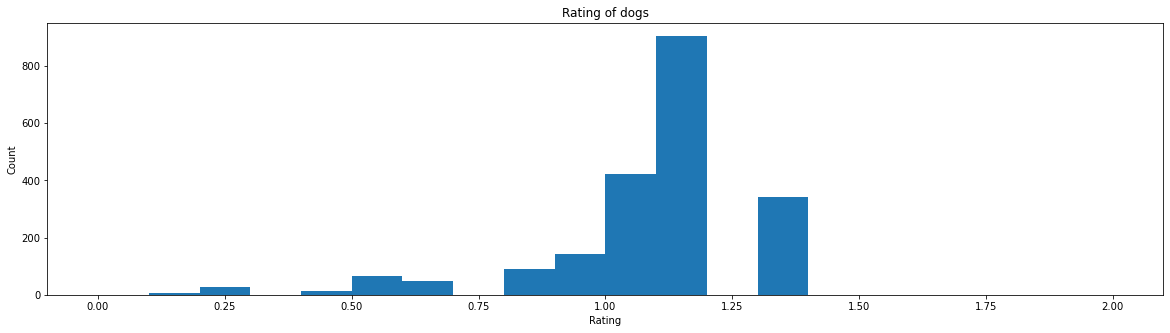

In [1680]:
#visualization of distribution of ratings

plt.figure(figsize=(20,5))
plt.hist(data=df, x='rating', bins=20, range=[0,2])

plt.title('Rating of dogs')
plt.xlabel('Rating')
plt.ylabel('Count');

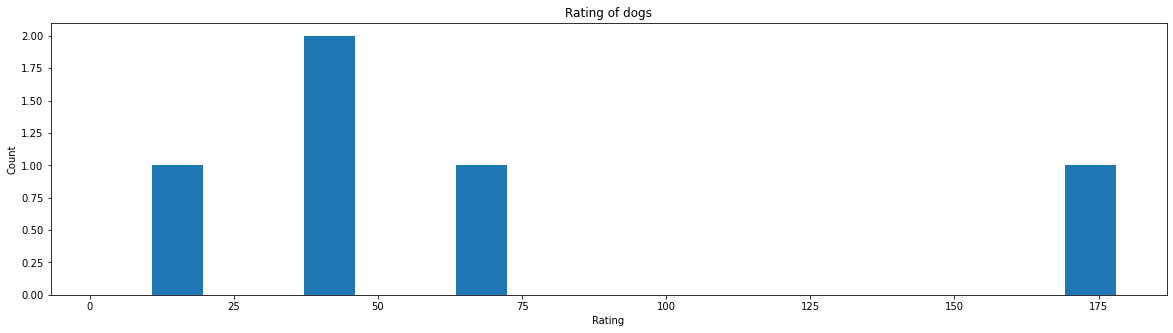

In [1681]:
plt.figure(figsize=(20,5))
plt.hist(data=df, x='rating', bins=20, range=[2,178])

plt.title('Rating of dogs')
plt.xlabel('Rating')
plt.ylabel('Count');

There are some very large outliers (e.g. 177.60) but most values are within the range of 0 to 1.2.

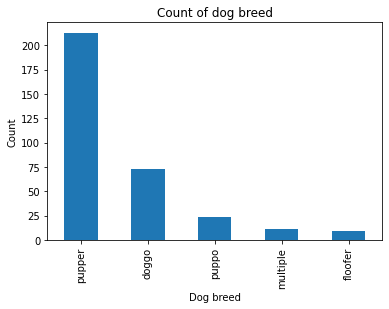

In [1682]:
#Which dog breed is represented the most? 

#visualize count of dog breeds
df.dog_breed.value_counts().plot.bar()
plt.title('Count of dog breed')
plt.xlabel('Dog breed')
plt.ylabel('Count');

The dog breed pupper is represented the most and the dog breed floofer is represented the least.

In [1683]:
#What is the most common prediction of dog breeds from the image classification algorithm?

#filter only dogs
df_p1_dog = df.query('p1_dog == True')

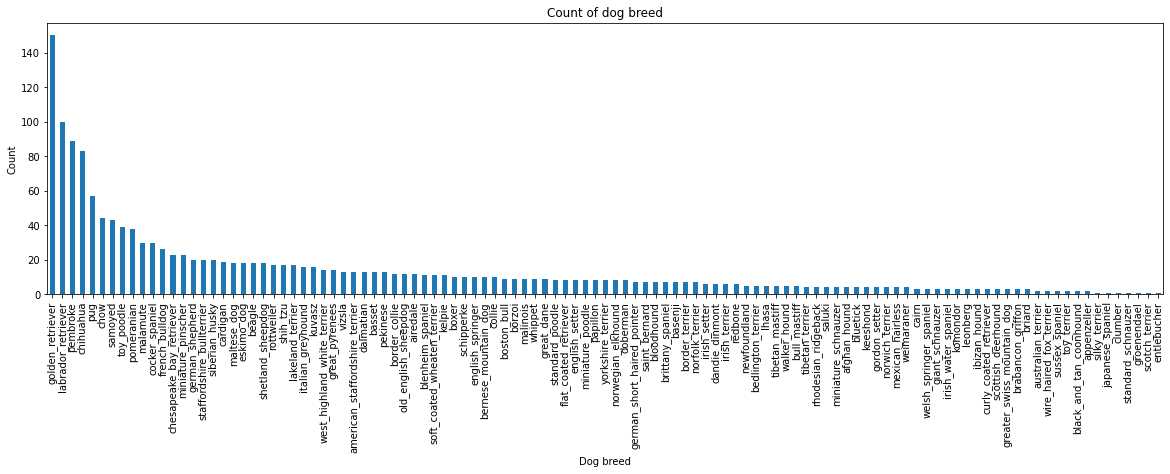

In [1684]:
#visualize count of predicted dog breeds
plt.figure(figsize=(20,5))
df_p1_dog.p1.value_counts().plot.bar()

plt.title('Count of dog breed')
plt.xlabel('Dog breed')
plt.ylabel('Count');

The Golden Retriever is the dog breed which is mostly predicted by the algorithm.